In [1]:
import pandas as pd
import numpy as np

In [2]:
moje_data = pd.read_csv('heart.csv', sep=',')
moje_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
moje_data_dummies = pd.get_dummies(moje_data, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first=False)

In [4]:
moje_data_dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [5]:
#Rozdelenie dát na testovacie/trénovacie množiny

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X_train, X_test, y_train, y_test = train_test_split(moje_data_dummies[['Age','Sex_F','Sex_M','MaxHR','Cholesterol','ExerciseAngina_N','ExerciseAngina_Y']], moje_data_dummies['HeartDisease'], test_size = 0.2)

In [6]:
#Vytvorenie klasifikátora
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)

In [7]:
#Predikcia
y_pred = clf.predict(X_test)

In [8]:
print("Presnosť predikcie:", metrics.accuracy_score(y_test, y_pred))

Presnosť predikcie: 0.8152173913043478


In [9]:
#Importy knižníc
import pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 

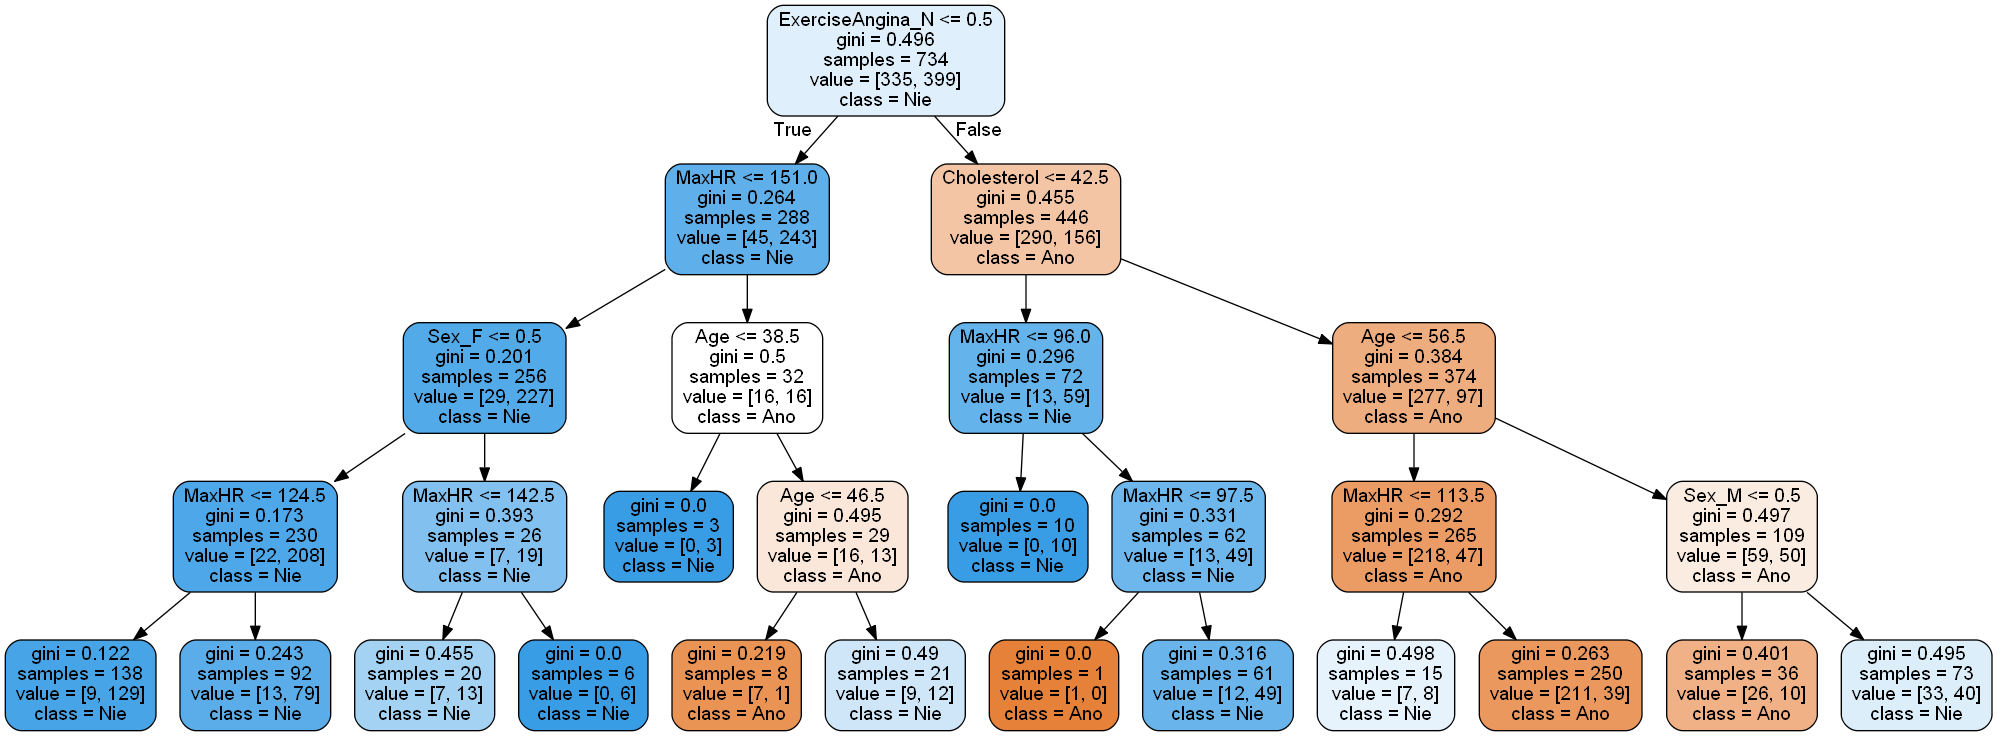

In [13]:
#Vizualizácia rozhodovacieho stromu
vlastnosti = ['Age','Sex_F','Sex_M','MaxHR','Cholesterol','ExerciseAngina_N','ExerciseAngina_Y']

dot_data = StringIO()
export_graphviz(clf, 
                out_file = dot_data,
                feature_names = vlastnosti,
                class_names = ["Ano", "Nie"],
                rounded = True, 
                filled = True,
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('skuska.png')
Image(graph.create_png())

In [14]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names, Y):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    pathto=dict()

    global k
    k = 0
    def recurse(node, depth, parent):
        global k
        indent = "  " * depth

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            s= "{} <= {} ".format( name, threshold, node )
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s

            recurse(tree_.children_left[node], depth + 1, node)
            s="{} > {}".format( name, threshold)
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s
            recurse(tree_.children_right[node], depth + 1, node)
        else:
            k=k+1
            print(k,')',pathto[parent], tree_.value[node])
    recurse(0, 1, 0)
   
tree_to_code(clf, vlastnosti, y_train)

1 ) ExerciseAngina_N <= 0.5  & MaxHR <= 151.0  & Sex_F <= 0.5  & MaxHR <= 124.5  [[  9. 129.]]
2 ) ExerciseAngina_N <= 0.5  & MaxHR <= 151.0  & Sex_F <= 0.5  & MaxHR > 124.5 [[13. 79.]]
3 ) ExerciseAngina_N <= 0.5  & MaxHR <= 151.0  & Sex_F > 0.5 & MaxHR <= 142.5  [[ 7. 13.]]
4 ) ExerciseAngina_N <= 0.5  & MaxHR <= 151.0  & Sex_F > 0.5 & MaxHR > 142.5 [[0. 6.]]
5 ) ExerciseAngina_N <= 0.5  & MaxHR > 151.0 & Age <= 38.5  [[0. 3.]]
6 ) ExerciseAngina_N <= 0.5  & MaxHR > 151.0 & Age > 38.5 & Age <= 46.5  [[7. 1.]]
7 ) ExerciseAngina_N <= 0.5  & MaxHR > 151.0 & Age > 38.5 & Age > 46.5 [[ 9. 12.]]
8 ) ExerciseAngina_N > 0.5 & Cholesterol <= 42.5  & MaxHR <= 96.0  [[ 0. 10.]]
9 ) ExerciseAngina_N > 0.5 & Cholesterol <= 42.5  & MaxHR > 96.0 & MaxHR <= 97.5  [[1. 0.]]
10 ) ExerciseAngina_N > 0.5 & Cholesterol <= 42.5  & MaxHR > 96.0 & MaxHR > 97.5 [[12. 49.]]
11 ) ExerciseAngina_N > 0.5 & Cholesterol > 42.5 & Age <= 56.5  & MaxHR <= 113.5  [[7. 8.]]
12 ) ExerciseAngina_N > 0.5 & Cholesterol > 